<a href="https://colab.research.google.com/github/guidoivetta/atention-mechanisms-as-baseline-for-VQA/blob/main/fastai_image_classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## El código usado para preprocesar y entrenar está fuertemente inspirado en [este post](https://towardsdatascience.com/plant-disease-detection-web-application-using-fastai-b0c389b82371).


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import gdown

In [ ]:
PATH_IMG = Path('PlantVillage/')

In [ ]:
bs = 64 # batch_size

In [ ]:
img_data = ImageDataBunch.from_folder(path=PATH_IMG, train='train', valid='val', ds_tfms=get_transforms(), size=224, bs=bs)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
Tomato_Spider_mites_Two_spotted_spider_mite, Tomato__Tomato_mosaic_virus, Tomato_Early_blight, Tomato_Septoria_leaf_spot, Tomato_healthy...
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


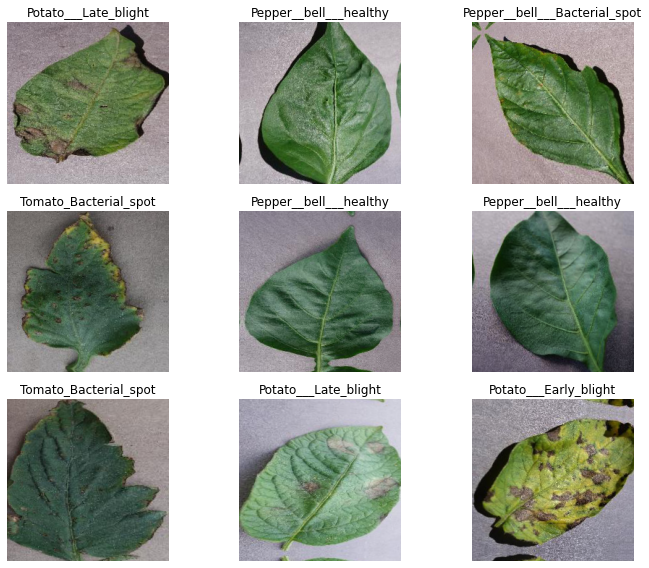

In [ ]:
img_data.show_batch(rows=3, figsize=(10,8))

In [ ]:
img_data.c

6

In [ ]:
img_data.classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot']

In [ ]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.572705,0.063141,0.979568,0.020432,19:21
1,0.215012,0.034071,0.987711,0.012289,01:50
2,0.114522,0.028422,0.990228,0.009772,01:49
3,0.065896,0.014471,0.995410,0.004590,01:48
4,0.046472,0.013936,0.995706,0.004294,01:49


In [ ]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.058321,0.049111,0.984898,0.015102,01:49
1,0.044631,0.016872,0.995410,0.004590,01:50


In [ ]:
model.save('train_7_cycles')

In [ ]:
interpret = ClassificationInterpretation.from_learner(model)

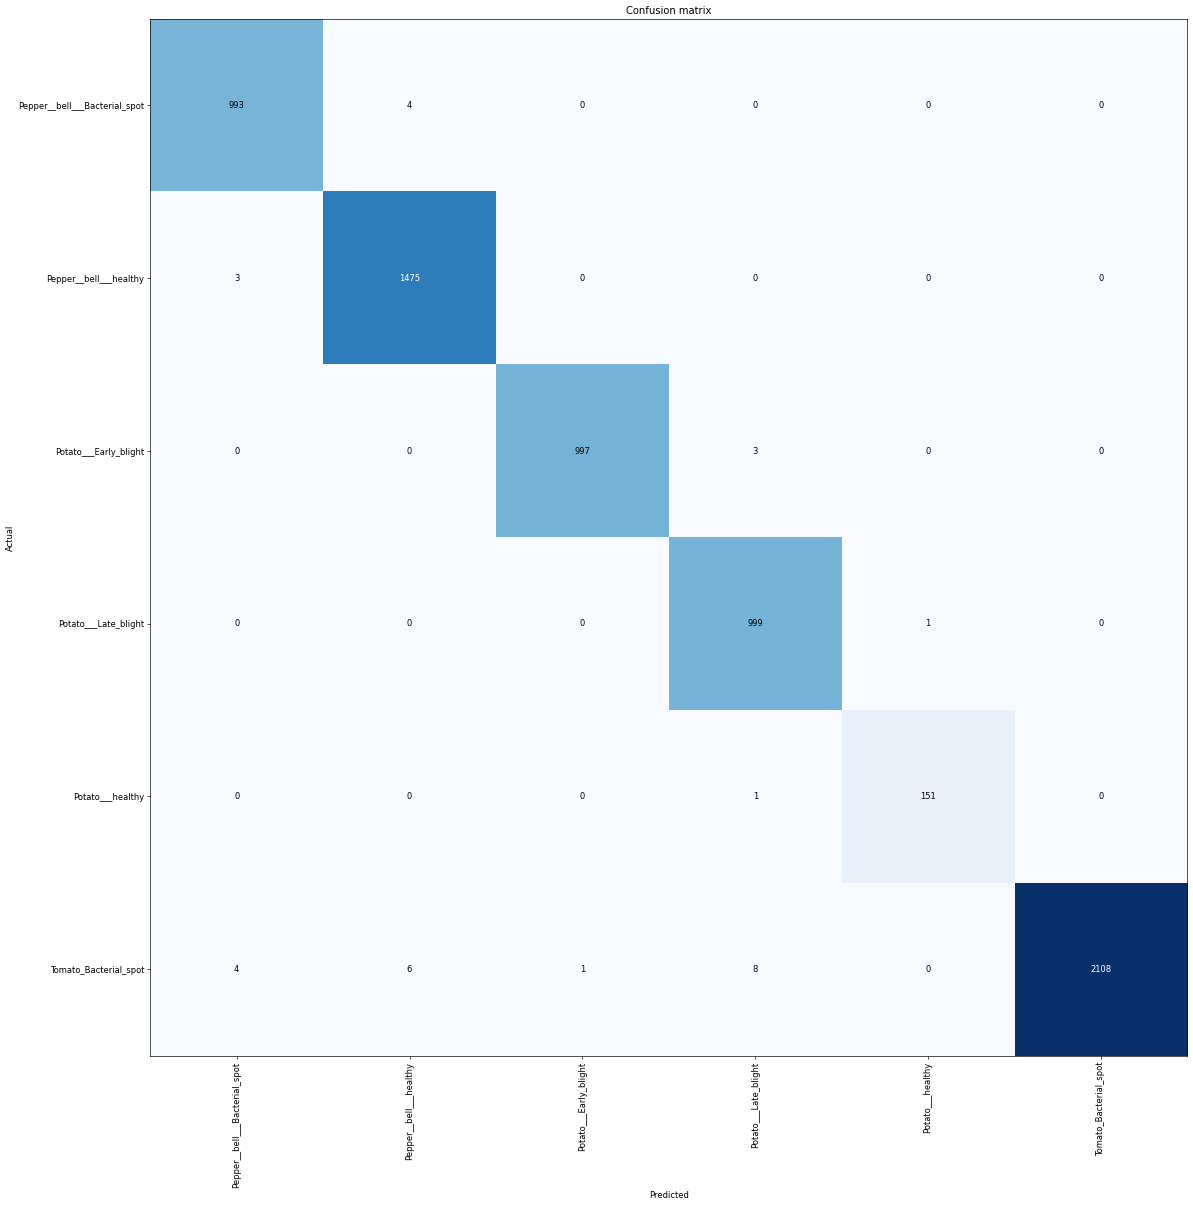

In [ ]:
interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [ ]:
model.load('train_7_cycles')

In [ ]:
model.export(os.path.abspath('./my_export.pkl'))

In [ ]:
learn = load_learner("/content/drive/MyDrive/tesis/Kaggle/detection_fastai/PlantVillage/",'my_export.pkl')

Aquí se ve en uso el predictor.

A a partir de una imagen genera el nombre de la categoría a la que pertenece.

In [ ]:
prefix='/content/drive/MyDrive/tesis/Kaggle/PlantVillage_Diseased_Healthy/Healthy'
path=prefix+"/faac0cc4-4c25-4962-9a6d-6203a1b02af3___JR_HL 8415.JPG"
#path='/content/drive/MyDrive/tesis/Kaggle/PlantVillage_Diseased_Healthy/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG'
with open(path, "rb") as image:
  img_bytes = image.read()
  img = open_image(BytesIO(img_bytes))
  prediction = learn.predict(img)[0]
  print(prediction)

Pepper__bell___healthy
